##### **Nama   : Sannie Octavhia**
##### **NIM    : 2209106015**
##### **Kelas  : Informatika A 22**
##### **POSTTEST 7 KECERDASAN BUATAN**

Link Dataset : https://www.kaggle.com/datasets/faldoae/padangfood

##### **Import Library**

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### **Masukkan ke base_dir dataset**

In [2]:
base_dir = r'F:\Posttest_KB_2\Posttest_KB_7\Telur'

##### **Lakukan split folder untuk mendapatkan train, test dan val**

In [3]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=[.8,.1,.1])

##### **Masukkan copy path dari pada split folder tadi tiap masing-masingnya**

In [4]:
train_img_path = r'F:\Posttest_KB_2\Posttest_KB_7\dataset_final\train'
test_img_path = r'F:\Posttest_KB_2\Posttest_KB_7\dataset_final\test'
validation_img_path = r'F:\Posttest_KB_2\Posttest_KB_7\dataset_final\val'
class_names = os.listdir(train_img_path)

##### **Read Dataset dan melakukan split dataset menjadi train, validation dan test**

In [5]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [6]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary ( Telur Dadar | Telur Balado )
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
    # shuffle=False
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary',
)

Found 172 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


##### **Menampilkan nama kelas Dataset**

In [7]:
class_names

['telur_balado', 'telur_dadar']

##### **Menampilkan Batch Gambar dari Train Generator**

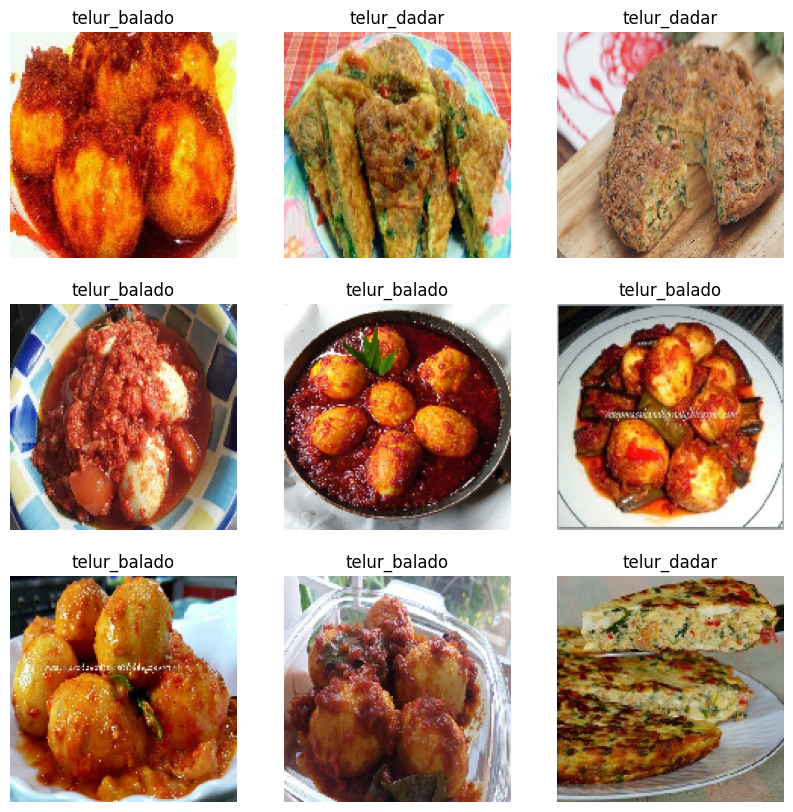

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

##### **Modeling Sequential**

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

##### **Model Compile**

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(  
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
2/2 [==============================] - 51s 13s/step - loss: 0.7722 - accuracy: 0.5116 - val_loss: 0.6882 - val_accuracy: 0.4762
Epoch 2/100
2/2 [==============================] - 39s 10s/step - loss: 0.6885 - accuracy: 0.5233 - val_loss: 0.6874 - val_accuracy: 0.4762
Epoch 3/100
2/2 [==============================] - 25s 18s/step - loss: 0.6771 - accuracy: 0.4651 - val_loss: 0.6626 - val_accuracy: 0.4762
Epoch 4/100
2/2 [==============================] - 27s 20s/step - loss: 0.6495 - accuracy: 0.4651 - val_loss: 0.6209 - val_accuracy: 0.5238
Epoch 5/100
2/2 [==============================] - 28s 8s/step - loss: 0.6105 - accuracy: 0.5291 - val_loss: 0.5651 - val_accuracy: 0.7143
Epoch 6/100
2/2 [==============================] - 24s 7s/step - loss: 0.5608 - accuracy: 0.6512 - val_loss: 0.5131 - val_accuracy: 0.7619
Epoch 7/100
2/2 [==============================] - 24s 16s/step - loss: 0.5630 - accuracy: 0.6744 - val_loss: 0.4848 - val_accuracy: 0.9048
Epoch 8/100
2/2 [=====

In [13]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 0.2710 - accuracy: 0.8750


[0.2709977626800537, 0.875]

##### **Grafik Pergerakan Metrik Akurasi dan Loss Training Validation**

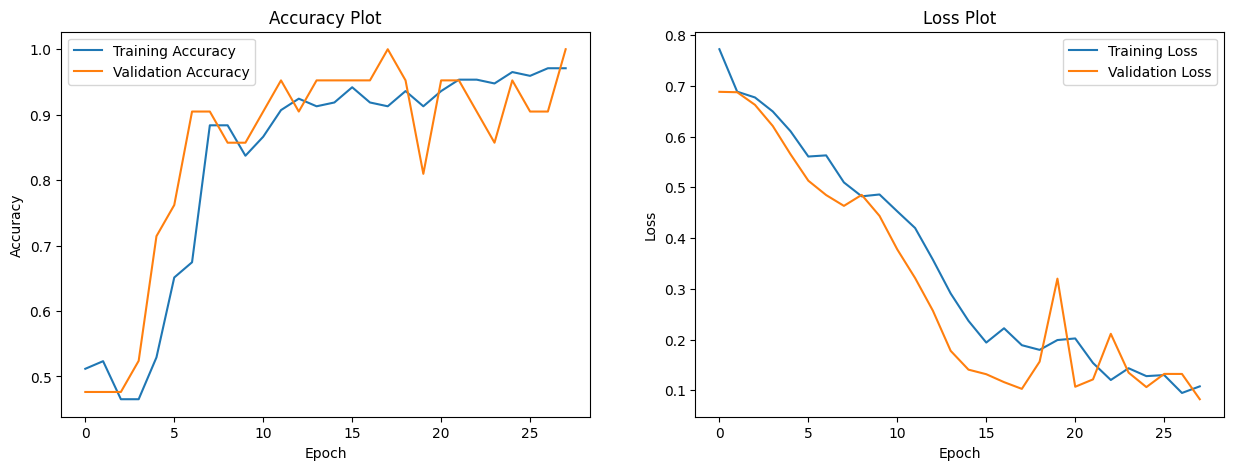

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### **Menampilkan Hasil Prediksi Model**

In [15]:
from PIL import Image
import numpy as np
from skimage import transform 

In [16]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'F:\Posttest_KB_2\Posttest_KB_7\Telur\telur_balado\telur_balado (12).jpg')
img_pred = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [17]:
pred = np.where(img_pred > 0.5,"Telur Dadar","Telur Balado")
pred

array([['Telur Balado']], dtype='<U12')

In [18]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'F:\Posttest_KB_2\Posttest_KB_7\Telur\telur_dadar\telur_dadar (22).jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 100ms/step


In [19]:
pred = np.where(img_pred > 0.5,"Telur Dadar","Telur Balado")
pred

array([['Telur Dadar']], dtype='<U12')